In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

# Matplotlib multiple plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 

## 1. Bar chart
- x data : category

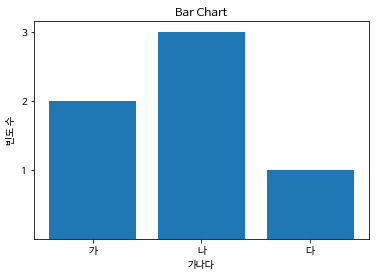

In [3]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

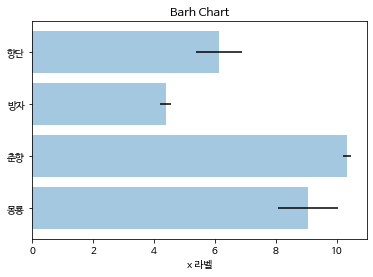

In [4]:
np.random.seed(2021)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')
plt.show()

## Titanic number of passengers per cabin

In [5]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
s = titanic['class'].value_counts()
s

Third     491
First     216
Second    184
Name: class, dtype: int64

In [11]:
df = titanic[['class', 'pclass']].groupby('class').count()
df

,pclass
class,
First,216
Second,184
Third,491


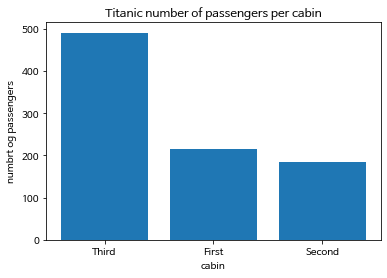

In [15]:
y = s.values
x = np.arange(len(y))
xlabel = s.index.to_list()

plt.title('Titanic number of passengers per cabin')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('cabin')
plt.ylabel('numbrt og passengers')
plt.show()

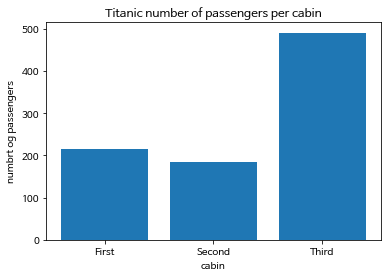

In [17]:
y = df.pclass.values
x = np.arange(len(y))
xlabel = df.index.to_list()

plt.title('Titanic number of passengers per cabin')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('cabin')
plt.ylabel('numbrt og passengers')
plt.show()

## 2. pie chart
- relative comparision of category val 

In [ ]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10] # sum : 100
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 3. histogram
- data distribution check 

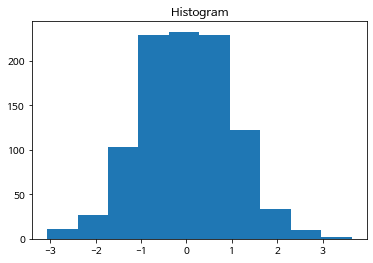

In [18]:
np.random.seed(2021)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10) # 10 equals
plt.show()

In [19]:
bins

array([-3.0663246 , -2.39581956, -1.72531451, -1.05480946, -0.38430442,
        0.28620063,  0.95670567,  1.62721072,  2.29771577,  2.96822081,
        3.63872586])

In [20]:
arrays

array([ 11.,  27., 103., 229., 233., 229., 122.,  34.,  10.,   2.])

## 4. scatter plot
- corr with 2 float data set

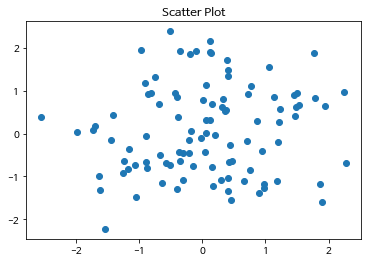

In [21]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

## Anscombe's Quartet
- linear regression: y = 3.0 + 0.5 * x

In [22]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [23]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [30]:
ans.dataset.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [24]:
ans.groupby('dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

- Dataset I 에 대해서 산점도와 회귀선 그리기

In [25]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


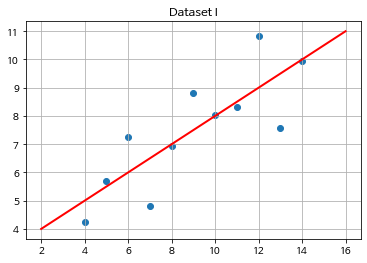

In [29]:
plt.scatter(ds1.x, ds1.y)
plt.plot([2,16], [4, 11], c='r', lw=2)
plt.grid()
plt.title('Dataset I')
plt.show()

- draw 4 all dataset

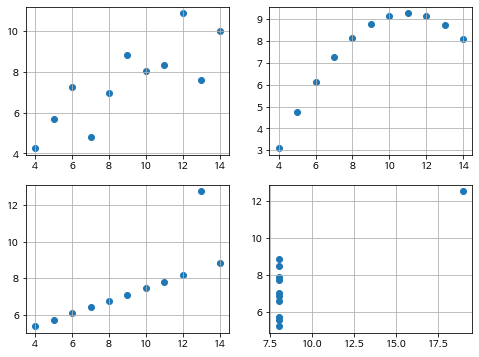

In [35]:
fig, axes = plt.subplots(2,2, figsize=(8,6))

for idx, roman in enumerate(['I', 'II', 'III', 'IV']):
  ds = ans[ans.dataset == roman]
  ax = axes[idx // 2, idx % 2]
  ax.scatter(ds.x, ds.y)
  ax.grid()

plt.show()

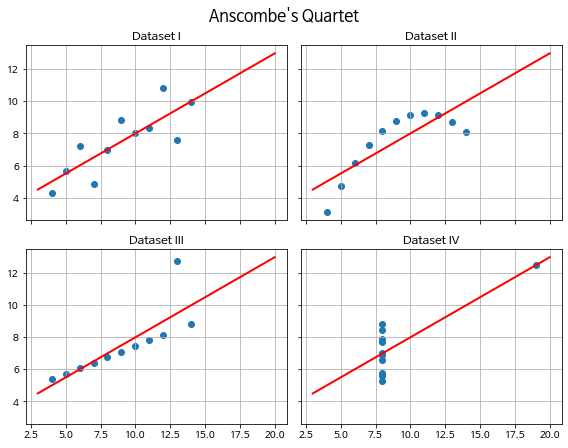

In [42]:
fig, axes = plt.subplots(2,2, figsize=(8,6), sharex= True, sharey= True)

for idx, roman in enumerate(['I', 'II', 'III', 'IV']):
  ds = ans[ans.dataset == roman]
  ax = axes[idx//2, idx%2]
  ax.scatter(ds.x, ds.y)
  ax.plot([3,20],[4.5,13], 'r-', lw=2) # y = 0.5 * x + 3
  ax.set_title(f'Dataset {roman}')
  ax.grid()

fig.suptitle('Anscombe\'s Quartet', fontsize=16 , y = 1.03)
plt.tight_layout()
plt.show()

## 5. Imshow
- 2D img data(picture)

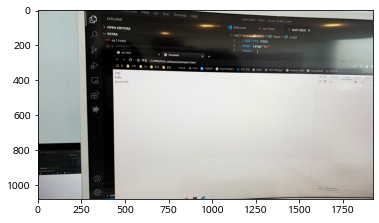

In [45]:
import matplotlib.image as img # PIL, OpenCV(cv2)

image = img.imread('/content/final1.jpg')
plt.imshow(image)
plt.show()

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [47]:
digits.images.shape

(1797, 8, 8)

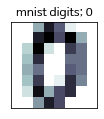

In [48]:
plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

## 6. Box plot

In [49]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- feature's boxplot per setosa 

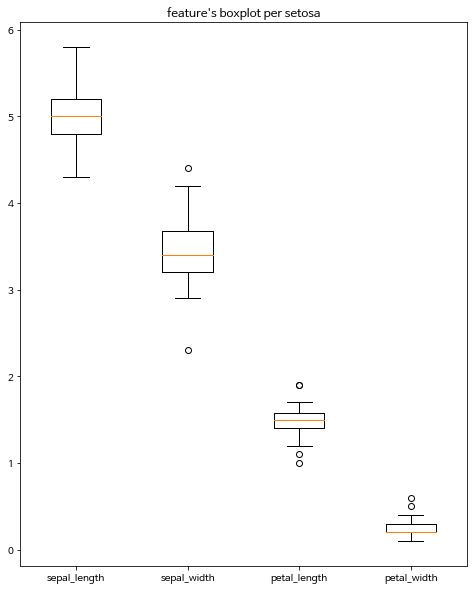

In [52]:
setosa = iris[iris.species == 'setosa']
plt.figure(figsize=(8,10))
plt.boxplot([setosa.sepal_length, setosa.sepal_width,
            setosa.petal_length, setosa.petal_width], 
            labels=['sepal_length','sepal_width', 'petal_length', 'petal_width'])
plt.title('feature\'s boxplot per setosa')
plt.show()

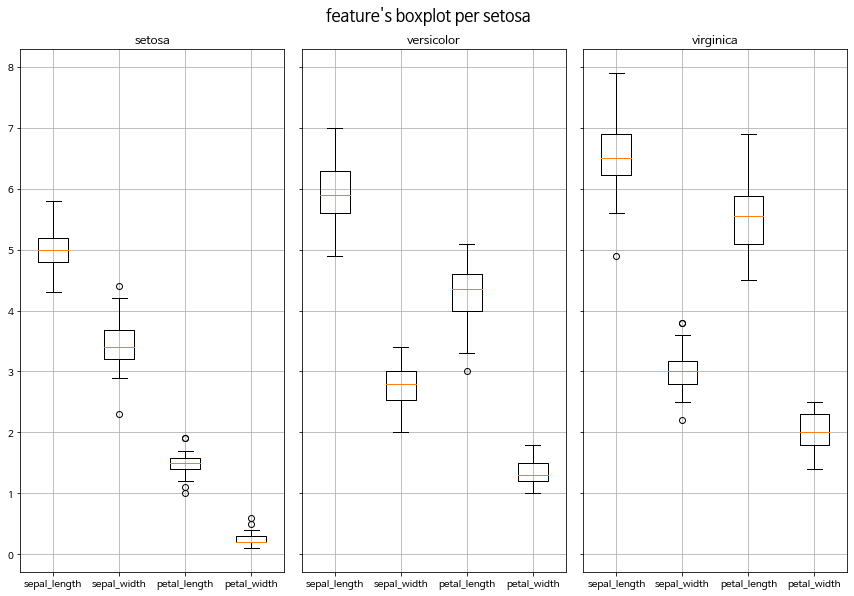

In [60]:
fig, axes = plt.subplots(1,3, figsize=(12,8),  sharey= True)

for idx, species in enumerate(iris.species.unique()):
  sub = iris[iris.species == species]
  ax = axes[idx]
  ax.boxplot([sub.sepal_length, sub.sepal_width,
            sub.petal_length, sub.petal_width], 
            labels=['sepal_length','sepal_width', 'petal_length', 'petal_width'])
  ax.set_title(species)
  ax.grid()

fig.suptitle('feature\'s boxplot per setosa', fontsize = 16 , y = 1.03)
plt.tight_layout()
plt.show()